In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
from sklearn.model_selection import train_test_split # 훈련세트와 테스트세트를 적절하게 섞어서 만들어주는 함수 

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target) # stratify = fish_target : 값의 비율만큼 데이터를 정해줌 

In [12]:
print(test_target)

[0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kn = KNeighborsClassifier()

In [16]:
# 훈련 - fit
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [17]:
# 정확도 확인 - 테스트 세트 
kn.score(test_input, test_target)

1.0

In [18]:
# 도미 - 길이 25cm, 무게 150g
kn.predict([[25, 150]])

array([0.])

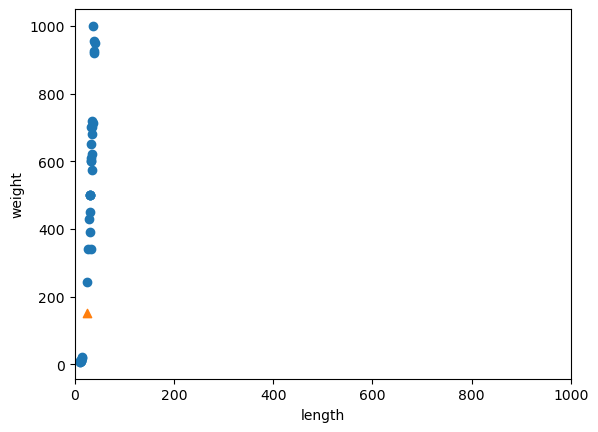

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [22]:
# 측정 수치 [25, 150] 최근접 이웃 5개 kneighbors으로 확인가능
distances, indexes = kn.kneighbors([[25, 150]])

In [24]:
# print(indexes) - [[10 15  0 26  5]]
train_target[indexes] # array([[1., 0., 0., 0., 0.]]) - 인접한 5개 중 4개가 방어이므로 [25, 150]을 방어로 인식

array([[1., 0., 0., 0., 0.]])

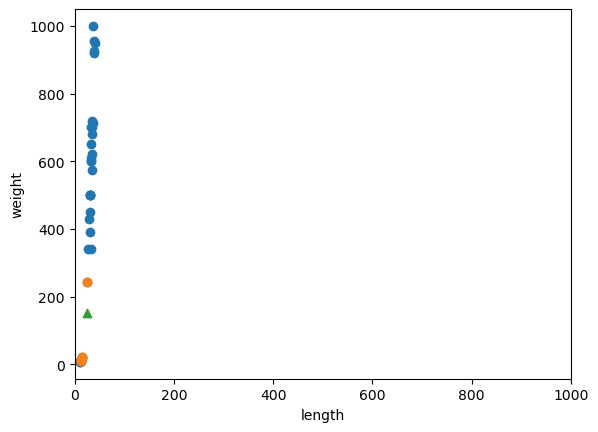

In [27]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker = '^')
plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [30]:
# 평균
mean = np.mean(train_input, axis = 0) # 행 기준

# 표준 편차
std = np.std(train_input, axis = 0) # 행 기준

In [33]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) / std # 표준 점수
print(train_scaled) # 무게, 길이에 상관없이 -1.5 ~ 1.5 값 반환

[[-1.29704351 -1.33828188]
 [ 0.26537975 -0.18852916]
 [ 1.11127769  1.56575194]
 [ 1.3600712   1.55022733]
 [ 0.61369066  0.61875064]
 [-1.54583702 -1.36839963]
 [ 0.46441456 -0.34377527]
 [ 0.16586234 -0.06433227]
 [ 1.11127769  1.45707966]
 [ 0.33504193  0.1530123 ]
 [-0.19240032 -0.64805766]
 [ 0.36489715  0.1530123 ]
 [-1.66525791 -1.3777144 ]
 [-1.59559573 -1.37243603]
 [ 0.56393196  0.77399676]
 [-1.22738133 -1.3376609 ]
 [ 0.86248418  0.81746567]
 [ 0.66344937  0.38588147]
 [ 0.41465585  0.1530123 ]
 [ 0.76296677  0.8360952 ]
 [-1.60554747 -1.36902061]
 [-1.74487183 -1.37864587]
 [ 0.71320807  0.52560297]
 [ 0.23552453  0.1530123 ]
 [ 0.76296677  0.77399676]
 [ 0.26537975 -0.00223382]
 [-1.48612658 -1.35784289]
 [-1.54583702 -1.36871012]
 [ 0.46441456  0.46350453]
 [ 1.21079509  1.47260427]
 [ 0.46441456  0.46350453]
 [-0.08293117 -0.34377527]
 [-1.52593354 -1.36902061]
 [ 0.96200158  1.70547344]
 [ 0.61369066  0.49455375]
 [ 0.76296677  0.71189831]]


In [35]:
new = (np.array([25, 150]) - mean) / std
print(new)

[-0.23220728 -0.93371051]


In [37]:
test_scaled = (test_input - mean) / std

In [38]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [39]:
kn.predict([new])

array([1.])

In [40]:
distances, indexes = kn.kneighbors([new])
print(indexes)

[[10 31  1  6  7]]


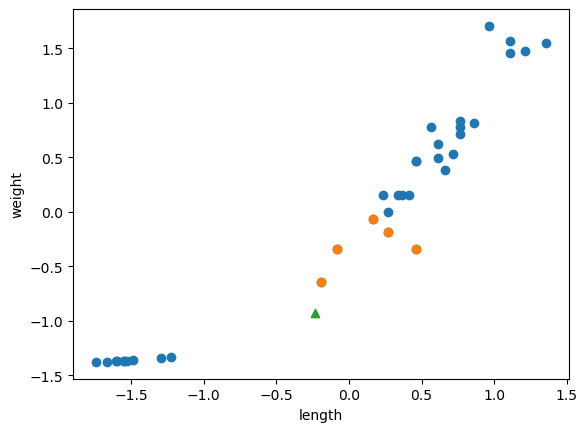

In [41]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
# plt.scatter(25, 150, marker = '^')
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler # 전처리 모듈

In [44]:
ss = StandardScaler() # fit., transform - 표준점수 변환

In [45]:
ss.fit(fish_data)

StandardScaler()

In [47]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [48]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [49]:
kn.score(test_scaled, test_target)

1.0